In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train"
test_path = r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Test"

## Import Libraries

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Visualization

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        if(img_array is not None):
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 144/144 [00:01<00:00, 97.13it/s]


In [5]:
# img_array=cv2.imread(file)
# if(img_array is not None):
#     img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [6]:
data.shape

(379, 2)

In [7]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\mk_Dataset\\Train\\Akash': 235,
         'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\mk_Dataset\\Train\\Rinub': 144})

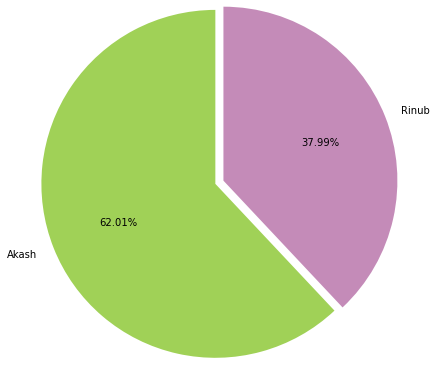

In [8]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Akash', 'Rinub'], colors= colors,radius=2)
plt.show()

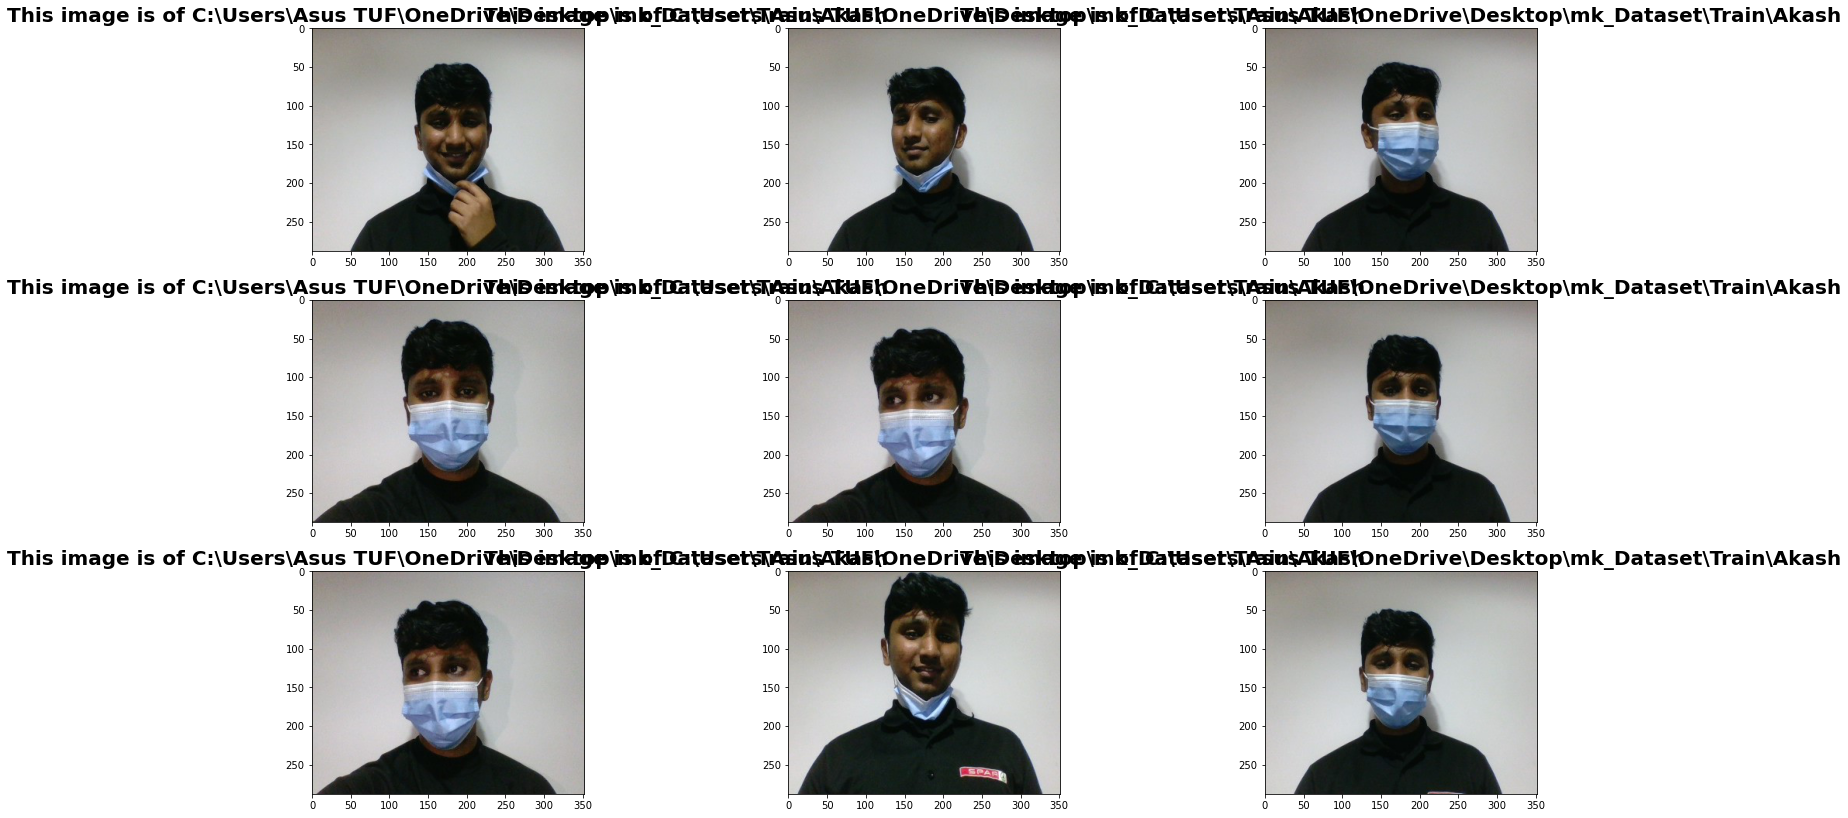

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(150)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [13]:
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 379 images belonging to 2 classes.
Found 379 images belonging to 2 classes.


In [17]:
hist = model.fit(train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
2/2 [==============================] - 19s 9s/step - loss: 1.1371 - accuracy: 0.5092 - val_loss: 0.6231 - val_accuracy: 0.9024
Epoch 2/10
2/2 [==============================] - 16s 8s/step - loss: 0.6479 - accuracy: 0.6860 - val_loss: 0.5250 - val_accuracy: 0.8391
Epoch 3/10
2/2 [==============================] - 16s 8s/step - loss: 0.5034 - accuracy: 0.8338 - val_loss: 0.3174 - val_accuracy: 0.9631
Epoch 4/10
2/2 [==============================] - 12s 6s/step - loss: 0.3330 - accuracy: 0.9050 - val_loss: 0.3073 - val_accuracy: 0.8971
Epoch 5/10
2/2 [==============================] - 12s 6s/step - loss: 0.3728 - accuracy: 0.8391 - val_loss: 0.1649 - val_accuracy: 0.9103
Epoch 6/10
2/2 [==============================] - 18s 9s/step - loss: 0.1859 - accuracy: 0.9340 - val_loss: 0.0517 - val_accuracy: 0.9947
Epoch 7/10
2/2 [==============================] - 19s 9s/step - loss: 0.0987 - accuracy: 0.9894 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==================

In [18]:
#Saving the model
model.save(r"C:\Users\Asus TUF\OneDrive\Desktop\akash_model\model_dl.h5")


In [19]:
import keras
model_dl = keras.models.load_model(r"C:\Users\Asus TUF\OneDrive\Desktop\akash_model\model_dl.h5") #look for local saved file

Instructions for updating:
Please use `model.predict()` instead.
The recognized image is Akash


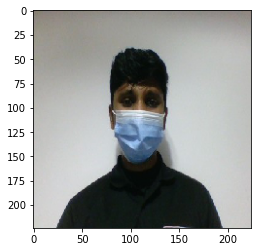

In [20]:
#We´ll use any image sample from the Kaggle dataset to test it 

from keras.preprocessing import image



img = image.load_img(r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train\Akash\WIN_20211129_17_00_32_Pro (2).jpg", target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model_dl.predict(image, batch_size=256)
probabilities = model_dl.predict_proba(image, batch_size= 256)
probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

# print(probabilities_formatted) 
if probabilities_formatted == ['100.00%', '0.00%']:
    print('The recognized image is Akash')
    plt.imshow(img)
    
else:
    print('The recognized image is an Rinub')
    plt.imshow(img)
# print(f'The predicted image corresponds to "{dict[classes.item()]}" with probability.') 



The recognized image is an Rinub


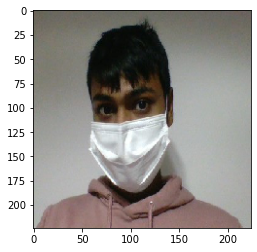

In [21]:
#We´ll use any image sample from the Kaggle dataset to test it 

from keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter

# dict = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"Cancel",11:"Check_Account_Balance",12:"Deposit_cash",13:"Next",14:"Withdraw_Cash"}


#Predicting images

img = image.load_img(r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train\Rinub\WIN_20211129_16_31_44_Pro.jpg", target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model_dl.predict(image, batch_size=256)
probabilities = model_dl.predict_proba(image, batch_size= 256)
probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

# print(probabilities_formatted) 
if probabilities_formatted == ['100.00%', '0.00%']:
    print('The recognized image is Akash')
    plt.imshow(img)
    
else:
    print('The recognized image is an Rinub')
    plt.imshow(img)
# print(f'The predicted image corresponds to "{dict[classes.item()]}" with probability.') 



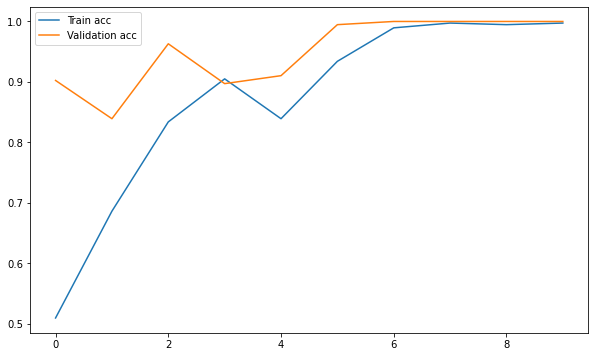

In [22]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

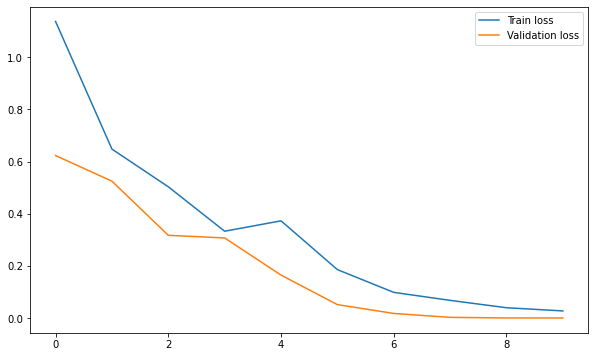

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()